### Importanto as bibliotecas necessarias

In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

### Criacao do DataFrame

In [2]:
data = load_iris()
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [3]:
print(data['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [4]:
df = pd.DataFrame(data['data'])
df['target'] = data['target']
features = [feature for feature in data['feature_names']]
features.append('target')
df.columns = features

In [5]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


### Relembrando um pouco do sklearn

In [6]:
X_train,X_test,y_train,y_test = train_test_split(df.iloc[:,:4],
                                                df['target'],
                                                stratify=df['target'],
                                                random_state=0)

In [7]:
type(X_train)

pandas.core.frame.DataFrame

## Conjunto de graficos 2 a 2 para as features


In [8]:
# Pegando a docstring pq ngm e obrigado a decorar 500 argumento
print(plt.scatter.__doc__)

A scatter plot of *y* vs *x* with varying marker size and/or color.

Parameters
----------
x, y : array_like, shape (n, )
    The data positions.

s : scalar or array_like, shape (n, ), optional
    The marker size in points**2.
    Default is ``rcParams['lines.markersize'] ** 2``.

c : color, sequence, or sequence of color, optional
    The marker color. Possible values:

    - A single color format string.
    - A sequence of color specifications of length n.
    - A sequence of n numbers to be mapped to colors using *cmap* and
      *norm*.
    - A 2-D array in which the rows are RGB or RGBA.

    Note that *c* should not be a single numeric RGB or RGBA sequence
    because that is indistinguishable from an array of values to be
    colormapped. If you want to specify the same RGB or RGBA value for
    all points, use a 2-D array with a single row.  Otherwise, value-
    matching will have precedence in case of a size matching with *x*
    and *y*.

    Defaults to ``None``. In that

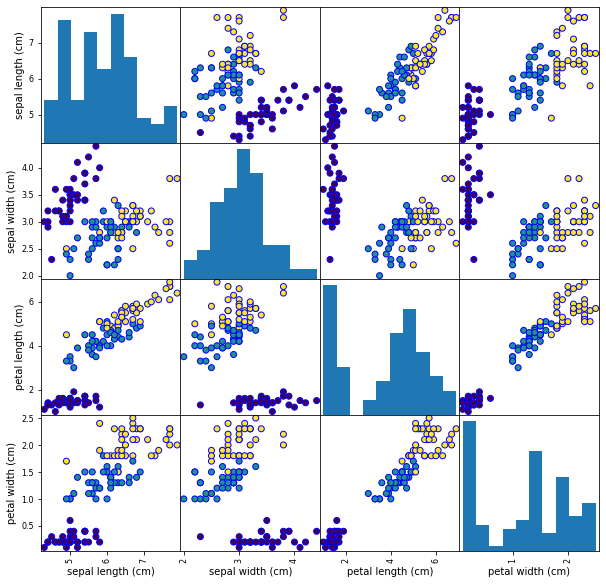

In [9]:
graficozin = pd.plotting.scatter_matrix(X_train,c=y_train,figsize=(10,10),
                                       marker='O',alpha=1.0,
                                       edgecolors='b')

In [15]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [20]:
knn.score(X_test,y_test)

1.0

100% de acerto com argumentos default. 5 vizinhos

## Considerando apenas as 2 variaveis mais importantes:

In [25]:
filtro = ['sepal length (cm)','petal width (cm)']
knn.fit(X_train[filtro],y_train)
knn.score(X_test[filtro],y_test)

0.9736842105263158